### Importing libraries & Reading image
We first import all the important libraries needed.

Using the cv2.imread(), we read the image by inputting a path and displaying it.

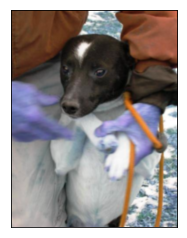

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#load an image in color
img = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\1.jpg')
plt.imshow(img,cmap='gray',interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()


# Basic Operations

## OpenCV for accessing and modifying pixel values

[81 37 20]
81


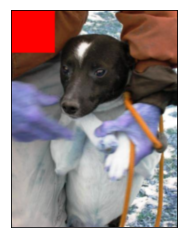

In [2]:
#Accessing pixel values
#getting the pixel intensities (rgb values) of a pixel
pix = img[100,100]
print (pix)

blue=img[100,100,0]
print (blue)

#Modifying pixel values
for i in range(100):
    for j in range(100):
        img[i,j]=[255,0,0]
    
plt.imshow(img,cmap='gray',interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()

* **Using Numpy for faster array calculations** 
* **They return scalar values**

In [3]:
#Accessing pixel values
print(img.item(10,10,2))
      
#Modifying each pixel
img.itemset((10,10,2),25)
print(img.item(10,10,2))


0
25


## Accessing image properties (ROI)

In [4]:
print(img.shape)
img2 = cv2.imread(r"C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\1.jpg",0)
print(img2.shape)
#total no of pixels
print(img.size)
print(img.dtype)

(499, 381, 3)
(499, 381)
570357
uint8


* **For eye detection in images, first perform face detection over the image until the face is found, then search within the face region for eyes. This approach improves accuracy. Using Numpy indexing, copying and pasting smaller regions of images.**

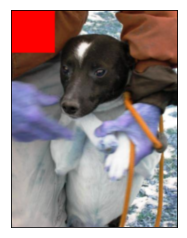

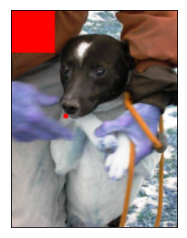

In [5]:
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()
ball = img[10:20, 30:40]
img[240:250, 120:130] = ball
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()

## Splitting and merging image channels

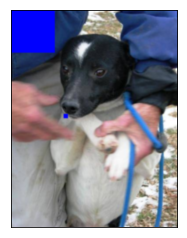

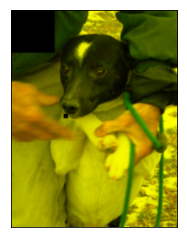

In [6]:
b,g,r=cv2.split(img)
img=cv2.merge((r,g,b))
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()
# to get only a particular color
b = img[:,:,0]
img[:,:,2]=0
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()
#cv2.split() is a costly operation

## Making borders for images, also termed as padding

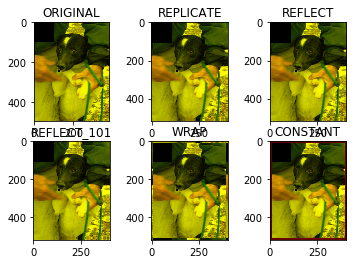

In [7]:
img1=img
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=(100,0,0))

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# Arithmetic Operations

## Addition

* Addition is possible only when two images are of the same size.
* Hence, we prefer to use OpenCV over Numpy

[[255]]
[4]


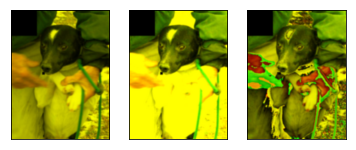

In [8]:
x = np.uint8([250])
y=np.uint8([10])
print(cv2.add(x,y)) # when using OpenCV, it is saturated addition
print(x+y) # this is a modulo operation

# The above applied to images
img1 = img
img2 = img
plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray',interpolation='bicubic')
plt.xticks([]), plt.yticks([]) 
final1 = cv2.add(img1,img2)
plt.subplot(1,3,2)
plt.imshow(final1,cmap='gray',interpolation='bicubic')
plt.xticks([]), plt.yticks([]) 

final2 = img1+img2
plt.subplot(1,3,3)
plt.imshow(final2,cmap='gray',interpolation='bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()

## Blending two images

* This is to introduce some amounts of transparency and opacity to the images.
* It is very important that the two images are of equal sizes.
* Else, zero padding is the key.


In [2]:
dog1 = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\1.jpg')
dog2 = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\2.jpg')

print(dog1.shape)
print(dog2.shape)

(499, 381, 3)
(299, 296, 3)


## Bitwise operators

* This comes to be of use when we need two images blended in a way such that the images should be on top of each other.
* They need not be of the same size

### Example of bitwise operators on the image
#### Reading images

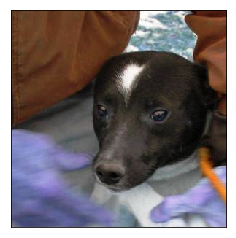

In [50]:
# Load two images
img1 = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\1.jpg')
img2 = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\2.jpg')

# I want to place the 2nd image on the top-left corner of the 1st image, so I create an ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ] # the roi is created in the first image such that the size is the same as that of the second image
plt.imshow(roi,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

#### Masking the images
* Now create a mask of the image and create its inverse mask also

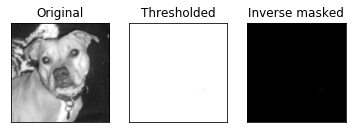

In [51]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) # bgr to gray conversion
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img2gray,cmap='gray',interpolation='bicubic')
plt.xticks([]),plt.yticks([])

ret, threshold = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY) # threshold set at 10 and max value at 255
plt.subplot(1,3,2)
plt.title("Thresholded")
plt.imshow(threshold,cmap='gray',interpolation='bicubic')
plt.xticks([]),plt.yticks([])

mask_inv = cv2.bitwise_not(threshold)  # to get the inverse of the the thresholded image
plt.subplot(1,3,3)
plt.title("Inverse masked")
plt.imshow(mask_inv,cmap='gray',interpolation='bicubic')
plt.xticks([]),plt.yticks([])

plt.show()

#### Black-out of the image 
* Now black-out the area of the image in ROI
* Take only  region of dog from image.
* When mask is done using a white image, the image that is masked is passed through(all pixels are true)
* The image that is masked with a black image is blocked completely(all pixels are 0)

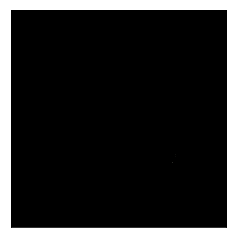

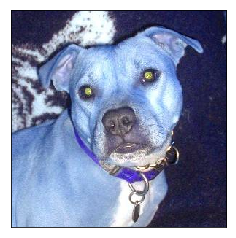

In [53]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv) # creating a background for the region of image in 
plt.imshow(img1_bg,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

img2_fg = cv2.bitwise_and(img2,img2,mask = threshold)
plt.imshow(img2_fg,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

#### Image display
* Adding the two images where img1_bg is the size of img2 and img2_fg is the same from before with no difference

In [54]:
print(img2_fg.shape)
print(img1_bg.shape)

(299, 296, 3)
(299, 296, 3)


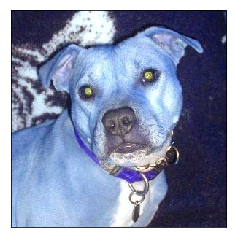

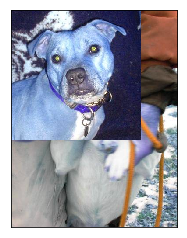

In [55]:
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(dst,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

plt.imshow(img1,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()